#import pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Read boston dataset

In [5]:



# FILEPATH: /path/to/your/csv/file.csv
bostonDf = pd.read_csv('HousingData.csv')

# Display the DataFrame
print(bostonDf.head(5))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


Overview of data

In [6]:
print(bostonDf.info())
print(bostonDf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

Check data for null values

In [7]:
null_counts = np.isnan(bostonDf).sum() # Count the number of missing values in each column of the DataFrame

print(null_counts)

null_rows = bostonDf[np.isnan(bostonDf).any(axis=1)]
print(null_rows.head(5))
print(null_rows.shape)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
4   0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
6   0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311     15.2   
9   0.17004  12.5   7.87   NaN  0.524  6.004  85.9  6.5921    5  311     15.2   
14  0.63796   0.0   8.14   NaN  0.538  6.096  84.5  4.4619    4  307     21.0   
35  0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279     19.2   

         B  LSTAT  MEDV  
4   396.90    NaN  36.2  
6   395.60  12.43  22.9  
9   386.71  17.10  18.9  
14  380.02  10.26  18.2  
35  396.90    NaN  18.9  
(112, 14)


In [8]:
null_counts = bostonDf.isnull().sum() # Count the number of missing values in each column of the DataFrame
print(null_counts)

null_rows = bostonDf[bostonDf.isnull().any(axis=1)]
print(null_rows.head(5))
print(null_rows.shape)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
4   0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
6   0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311     15.2   
9   0.17004  12.5   7.87   NaN  0.524  6.004  85.9  6.5921    5  311     15.2   
14  0.63796   0.0   8.14   NaN  0.538  6.096  84.5  4.4619    4  307     21.0   
35  0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279     19.2   

         B  LSTAT  MEDV  
4   396.90    NaN  36.2  
6   395.60  12.43  22.9  
9   386.71  17.10  18.9  
14  380.02  10.26  18.2  
35  396.90    NaN  18.9  
(112, 14)


Data cleaning
Column suitable for imputing with mean : CRIM ZN INDUS AGE LSTAT
column suitable for imputing with 0 :  CHAS
Not dropping any rows with null as already dataset is small.

In [9]:
#bostonDf.dropna(inplace=True)# Drop rows with missing values
#bostonDf.dropna(axis=1, inplace=True)# Drop columns with missing values
bostonDf['CHAS'].fillna(0, inplace=True)# Fill missing values with 0 for CHAS column
# fillmissing values withmean for columns CRIM ZN INDUS AGE LSTAT
bostonDf['CRIM'].fillna(bostonDf['CRIM'].mean(), inplace=True)
bostonDf['ZN'].fillna(bostonDf['ZN'].mean(), inplace=True)
bostonDf['INDUS'].fillna(bostonDf['INDUS'].mean(), inplace=True)
bostonDf['AGE'].fillna(bostonDf['AGE'].mean(), inplace=True)
bostonDf['LSTAT'].fillna(bostonDf['LSTAT'].mean(), inplace=True)

null_counts = bostonDf.isnull().sum() # Count the number of missing values in each column of the DataFrame
print(null_counts)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


No outlier  ,duplicates, no type mismatch 
drop_duplicates()`, `str.replace()`, and `astype()` are not used

EDA
1.distribution

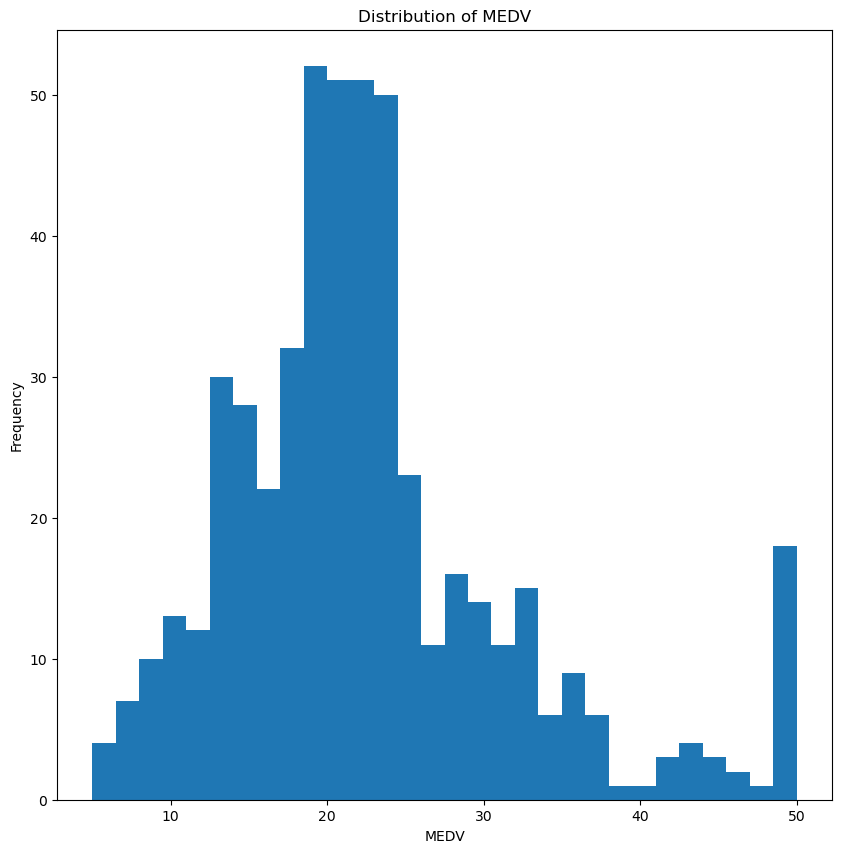

In [10]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(data=bostonDf, x='MEDV', bins=30)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()


Distribution isnormal with outlier for 49-50mevd value


         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.18   0.39 -0.05  0.41 -0.22  0.34 -0.37  0.61  0.57     0.27   
ZN      -0.18  1.00  -0.51 -0.03 -0.50  0.32 -0.54  0.64 -0.31 -0.31    -0.40   
INDUS    0.39 -0.51   1.00  0.05  0.74 -0.38  0.61 -0.70  0.59  0.72     0.38   
CHAS    -0.05 -0.03   0.05  1.00  0.07  0.11  0.07 -0.09 -0.00 -0.04    -0.11   
NOX      0.41 -0.50   0.74  0.07  1.00 -0.30  0.71 -0.77  0.61  0.67     0.19   
RM      -0.22  0.32  -0.38  0.11 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.34 -0.54   0.61  0.07  0.71 -0.24  1.00 -0.72  0.45  0.50     0.26   
DIS     -0.37  0.64  -0.70 -0.09 -0.77  0.21 -0.72  1.00 -0.49 -0.53    -0.23   
RAD      0.61 -0.31   0.59 -0.00  0.61 -0.21  0.45 -0.49  1.00  0.91     0.46   
TAX      0.57 -0.31   0.72 -0.04  0.67 -0.29  0.50 -0.53  0.91  1.00     0.46   
PTRATIO  0.27 -0.40   0.38 -0.11  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.37  0.17  -0.35  

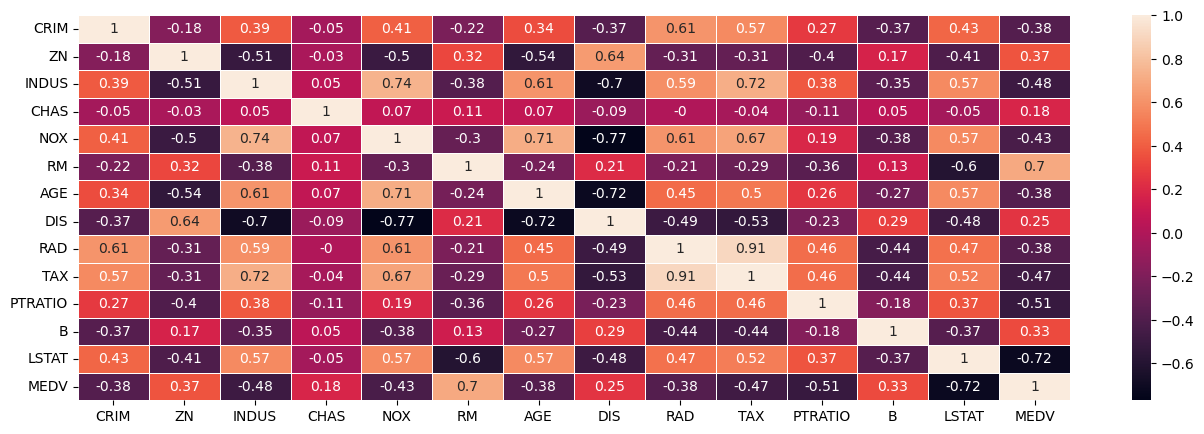

In [11]:

correlation_matrix = bostonDf.corr().round(2)
print(correlation_matrix)
# annot = True to print the values inside the square
plt.figure(figsize = (16,5))
ax = sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5)
plt.show()

MEDV is highly correlated positively to RM and negatively to LSTAT (|x|>0.5). the closer to 1 is highly correlated
(Tax and RAD) ,(DIST,AGE,INDUS,NOX) are hhighly correlated sets.soonly one should be used as feature/

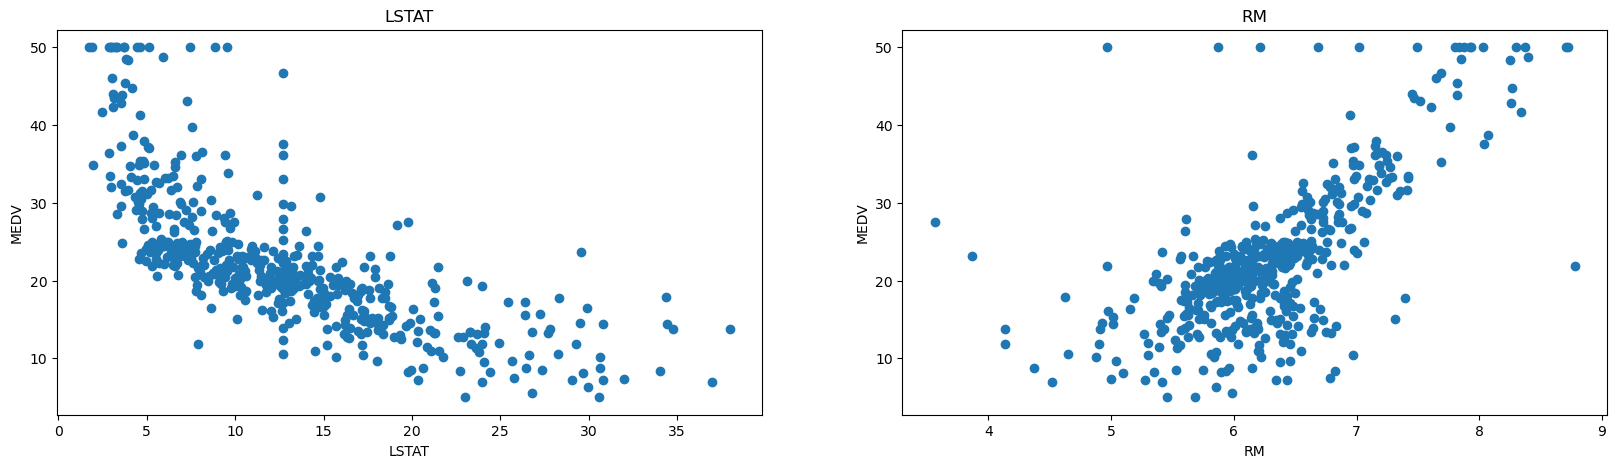

In [12]:
#scatter plot fortrend analysis
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bostonDf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostonDf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#MOdelling with only selected features



In [13]:
X = pd.DataFrame(np.c_[bostonDf['LSTAT'], bostonDf['RM']], columns = ['LSTAT','RM'])
Y = bostonDf['MEDV']

test train split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

# 1  linear regression model Normal SKLearn library

In [15]:
#data split as 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = root_mean_squared_error(Y_train, y_train_predict)
mse= mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MSE score is {}'.format(mse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MSE score is {}'.format(mse))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.7420988390505165
R2 score is 0.6161694121128031
MSE score is 32.97169907742529


The model performance for testing set
--------------------------------------
RMSE is 5.134765538745575
R2 score is 0.6632454421501066
MSE score is 32.97169907742529


2.stochostic descent algorithm
using  SGDRegressor 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor


In [24]:
print(X_train.head(1))
print(Y_train.head(1))

    LSTAT     RM
33  18.35  5.701
33    13.1
Name: MEDV, dtype: float64


In [16]:
#data standardisg
from sklearn import preprocessing


print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",X_train.shape)
print("X_Test Shape: ",X_test.shape)
print("Y_Train Shape: ",Y_train.shape)
print("Y_Test Shape: ",Y_test.shape)

# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
x_test=scaler.transform(X_test)

## Adding the PRIZE Column in the data
train_data=pd.DataFrame(X_train)
train_data['price']=Y_train
train_data.head(3)

x_test=np.array(X_test)
y_test=np.array(Y_test)


X Shape:  (506, 2)
Y Shape:  (506,)
X_Train Shape:  (404, 2)
X_Test Shape:  (102, 2)
Y_Train Shape:  (404,)
Y_Test Shape:  (102,)


SKLEARN SGD 

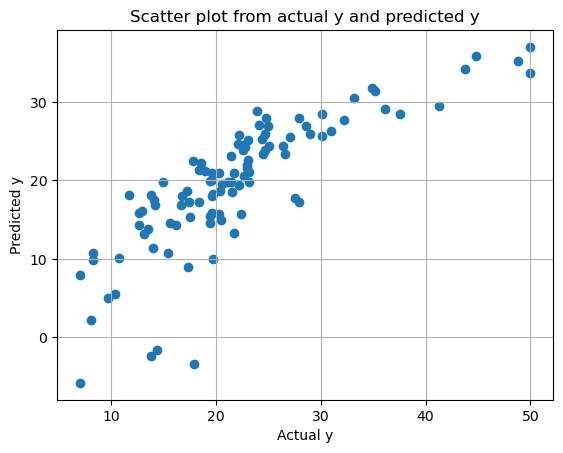

Mean Squared Error : 32.992402129837146


In [20]:
# SkLearn SGD classifier
from sklearn.linear_model import SGDRegressor


n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, Y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(Y_test, y_pred_sksgd))

#custom SGD implementation

In [21]:
def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias

In [22]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

w,b=MyCustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(X_test,w,b)

plt.scatter(Y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, y_pred_customsgd))

KeyError: 'MEDV'